We have the below information about the restaurants and we have to predict food cost

TITLE: The feature of the restaurant which can help identify what and for whom it is suitable for.

RESTAURANT_ID: A unique ID for each restaurant.

CUISINES: The variety of cuisines that the restaurant offers.

TIME: The open hours of the restaurant.

CITY: The city in which the restaurant is located.

LOCALITY: The locality of the restaurant.

RATING: The average rating of the restaurant by customers.

VOTES: The overall votes received by the restaurant.

COST: The average cost of a two-person meals

In [524]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [525]:
train_data=pd.read_excel('Data_Train.xlsx')

In [526]:
test_data=pd.read_excel('Data_Test.xlsx')

JOIN THE TRAIN AND TEST DATA

In [527]:
train_data['Source'] = 'train'
test_data['Source'] = 'test'

In [528]:
df = pd.concat([train_data, test_data], ignore_index = True)
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,Source
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0,train
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0,train
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0,train
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0,train
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0,train


as we have and train and test data and since data seems to be huge we have joined both to avoid double analysis

In [529]:
df.duplicated().sum()


26

In [530]:
df= df.drop_duplicates()


In [531]:
df.dtypes

TITLE             object
RESTAURANT_ID      int64
CUISINES          object
TIME              object
CITY              object
LOCALITY          object
RATING            object
VOTES             object
COST             float64
Source            object
dtype: object

In [532]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16895 entries, 0 to 16920
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TITLE          16895 non-null  object 
 1   RESTAURANT_ID  16895 non-null  int64  
 2   CUISINES       16895 non-null  object 
 3   TIME           16895 non-null  object 
 4   CITY           16748 non-null  object 
 5   LOCALITY       16767 non-null  object 
 6   RATING         16891 non-null  object 
 7   VOTES          15293 non-null  object 
 8   COST           12665 non-null  float64
 9   Source         16895 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.4+ MB


In [533]:
df.shape



(16895, 10)

In [534]:
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,Source
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0,train
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0,train
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0,train
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0,train
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0,train


In [535]:
df.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              147
LOCALITY          128
RATING              4
VOTES            1602
COST             4230
Source              0
dtype: int64

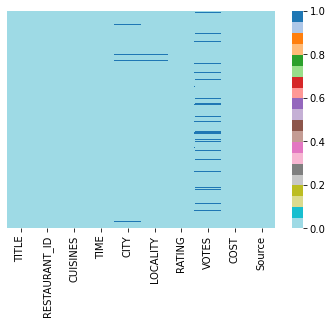

In [536]:
sns.heatmap(train_data.isnull(),yticklabels=False,cmap='tab20_r')

we are having null values in city,locality,rating,votes and cost

UNDERSTANDING THE COLUMNS

In [537]:
for column in train_data.columns:
    if train_data[column].dtypes==object:
        print(str(column)+':'+str(train_data[column].unique()))
        print('............................................................................................................')
        print('\n')

TITLE:['CASUAL DINING' 'CASUAL DINING,BAR' 'QUICK BITES' 'DESSERT PARLOR' 'CAFÉ'
 'MICROBREWERY' 'QUICK BITES,BEVERAGE SHOP' 'CASUAL DINING,IRANI CAFE'
 'BAKERY,QUICK BITES' 'None' 'BAR,CASUAL DINING' 'BAR' 'PUB'
 'BEVERAGE SHOP' 'FINE DINING' 'CAFÉ,QUICK BITES'
 'BEVERAGE SHOP,DESSERT PARLOR' 'SWEET SHOP,QUICK BITES'
 'DESSERT PARLOR,SWEET SHOP' 'BAKERY' 'BAKERY,DESSERT PARLOR' 'BAR,LOUNGE'
 'FOOD COURT' 'LOUNGE' 'DESSERT PARLOR,BEVERAGE SHOP'
 'LOUNGE,CASUAL DINING' 'FOOD TRUCK' 'QUICK BITES,FOOD COURT' 'SWEET SHOP'
 'BEVERAGE SHOP,FOOD COURT' 'PUB,CASUAL DINING' 'MESS'
 'MICROBREWERY,CASUAL DINING' 'CASUAL DINING,SWEET SHOP' 'KIOSK'
 'QUICK BITES,KIOSK' 'CLUB' 'FINE DINING,BAR' 'DESSERT PARLOR,QUICK BITES'
 'FOOD COURT,QUICK BITES' 'LOUNGE,CAFÉ' 'BAKERY,CONFECTIONERY'
 'CASUAL DINING,CAFÉ' 'DHABA' 'CAFÉ,DESSERT PARLOR'
 'QUICK BITES,DESSERT PARLOR' 'PUB,MICROBREWERY' 'LOUNGE,BAR'
 'DESSERT PARLOR,CAFÉ' 'CAFÉ,BAR' 'SWEET SHOP,CONFECTIONERY'
 'CASUAL DINING,PUB' 'MICROBREWERY,BAR' 'DE

In [538]:
df.apply(lambda x : len(x.unique()))


TITLE              123
RESTAURANT_ID    15574
CUISINES          5183
TIME              3295
CITY               451
LOCALITY          1637
RATING              33
VOTES             2076
COST                87
Source               2
dtype: int64

EXPLORATORY DATA ANALYSIS

before getting into univariate and bivariate analysis let us fill null columns and convert data into float or int to make any analysis

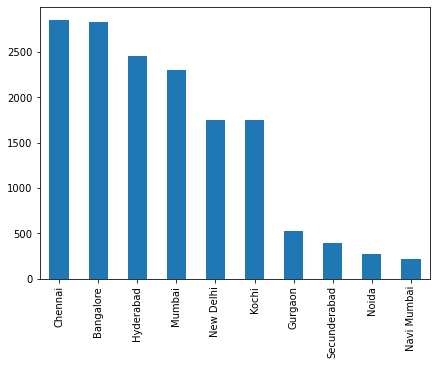

In [539]:
plt.figure(figsize = (7, 5))
Cities = df['CITY'].value_counts()[:10]
Cities.plot.bar();

to convert null values of ratings column i will first choose restaurants with highest population in our dataset 
chennai
bangalore
hyderabad
from these 3 cities cost i will take mean values and fill the null 

In [540]:
df[df['CITY'] == 'Chennai']['COST'].mean()




588.7896916705016

In [541]:
df[df['CITY'] == 'Bangalore']['COST'].mean()


669.0251748251749

In [542]:
df[df['CITY'] == 'Hyderabad']['COST'].mean()

595.1786695986806

In [543]:
df['RATING'].replace({'-': 0.0 ,'NEW' : 5.0}, inplace = True)

In [544]:
df['RATING'] = df['RATING'].astype(float)

In [545]:
df['RATING'].unique()

array([3.6, 4.2, 3.8, 4.1, 4. , 4.3, 3.9, 3.3, 3.4, 0. , 4.5, 3.5, 4.4,
       2.7, 3.7, 4.7, 5. , 3.1, 2.5, 4.6, 2.8, nan, 3. , 3.2, 2.6, 2.9,
       4.9, 4.8, 2.4, 2.3, 2. , 2.1, 2.2])

In [546]:
df['RATING'].fillna(df['RATING'].median(), inplace = True)
df['LOCALITY'].fillna(df['LOCALITY'].mode()[0], inplace = True)
df['CITY'].fillna(df['CITY'].mode()[0], inplace = True)

In [547]:
df.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY                0
LOCALITY            0
RATING              0
VOTES            1602
COST             4230
Source              0
dtype: int64

In [548]:
df.VOTES.fillna('0',inplace=True)
df['VOTES']=df['VOTES'].str.extract('(\d+)').astype(float)

In [549]:
df.head()


,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,Source
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200.0,train
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500.0,train
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221.0,800.0,train
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800.0,train
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165.0,300.0,train


In [550]:
df2 = df.drop(['TITLE','RESTAURANT_ID'],axis=1)
df2.head()

,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,Source
0,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200.0,train
1,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500.0,train
2,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221.0,800.0,train
3,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800.0,train
4,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165.0,300.0,train


In [551]:
cuisines_list=[]
for row in df['CUISINES']:
    cuisines_list.append(list(row.split(',')))

df['CUISINES']=cuisines_list

In [552]:
df_cuisines=df['CUISINES'].apply(lambda x: pd.Series(1, x))


In [554]:
title_list=[]
for row in df['TITLE']:
    title_list.append(list(row.split(',')))
df['TITLE']=title_list


In [555]:
df_title=df['TITLE'].apply(lambda x: pd.Series(1, x))


In [556]:
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,Source
0,[CASUAL DINING],9438,"[Malwani, Goan, North Indian]","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200.0,train
1,"[CASUAL DINING, BAR]",13198,"[Asian, Modern Indian, Japanese]",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500.0,train
2,[CASUAL DINING],10915,"[North Indian, Chinese, Biryani, Hyderabadi]","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221.0,800.0,train
3,[QUICK BITES],6346,"[Tibetan, Chinese]",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800.0,train
4,[DESSERT PARLOR],15387,[Desserts],11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165.0,300.0,train
...,...,...,...,...,...,...,...,...,...,...
16916,[CASUAL DINING],9057,"[North Indian, Mughlai, Chinese]",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287.0,NaN,test
16917,[None],1247,"[Biryani, North Indian, Sandwich, Salad, W...",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469.0,NaN,test
16918,[QUICK BITES],8617,"[Continental, North Indian]",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53.0,NaN,test
16919,[QUICK BITES],6485,"[Rolls, Beverages]","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,0.0,0.0,NaN,test


In [557]:
df_cuisines

,Malwani,Goan,North Indian,Asian,Modern Indian,Japanese,North Indian,Chinese,Biryani,Hyderabadi,...,Egyptian,African,Egyptian,Fish and Chips,Brazilian,South American,Mishti,Falafel,Cantonese,Hawaiian
0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16916,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16917,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16918,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [558]:
df_title

,CASUAL DINING,BAR,QUICK BITES,DESSERT PARLOR,CAFÉ,MICROBREWERY,BEVERAGE SHOP,IRANI CAFE,BAKERY,None,...,FOOD TRUCK,MESS,KIOSK,CLUB,CONFECTIONERY,DHABA,MEAT SHOP,COCKTAIL BAR,PAAN SHOP,BHOJANALYA
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16916,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16918,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16919,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


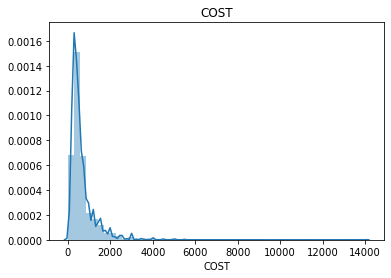

In [559]:
sns.distplot(df["COST"])
plt.title("COST")
plt.show()

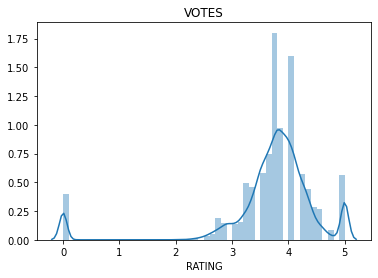

In [560]:
sns.distplot(df["RATING"])
plt.title("VOTES")
plt.show()

In [561]:
df.describe()

,RESTAURANT_ID,RATING,VOTES,COST
count,16895.000000,16895.000000,16895.000000,12665.000000
mean,7765.922344,3.700704,379.391773,655.400790
std,4494.226728,0.898039,808.915747,627.389831
min,0.000000,0.000000,0.000000,20.000000
25%,3869.500000,3.500000,40.000000,300.000000
50%,7750.000000,3.800000,133.000000,500.000000
75%,11672.000000,4.100000,409.000000,800.000000
max,15573.000000,5.000000,41186.000000,14000.000000


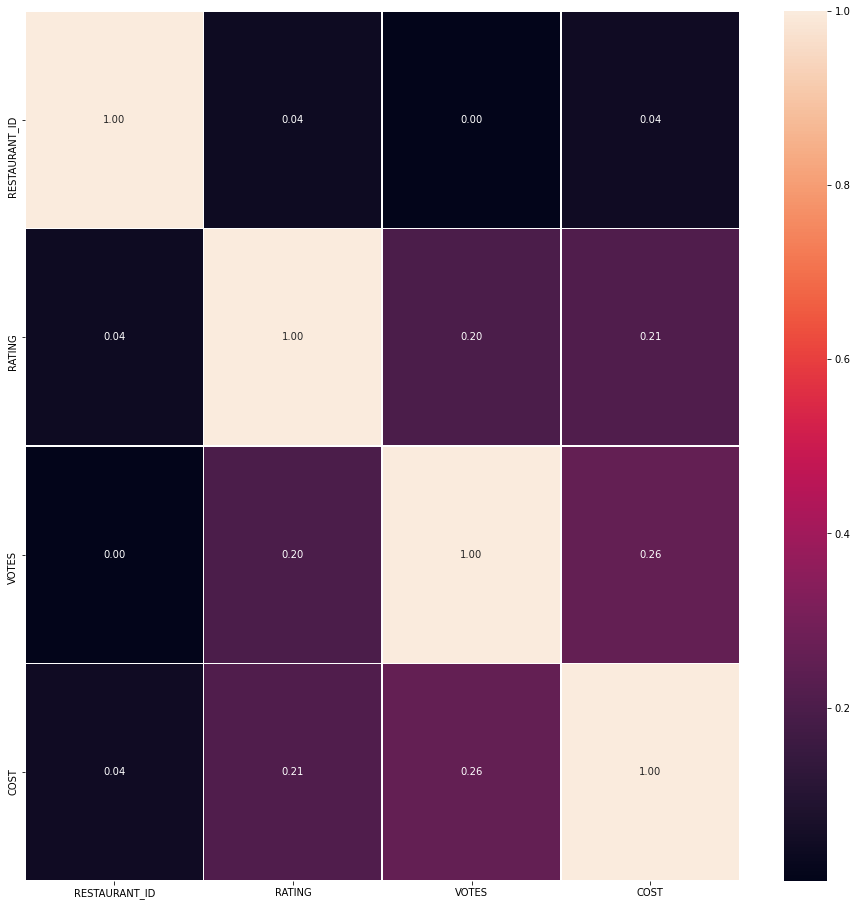

In [562]:
plt.figure(figsize = (16, 16))
sns.heatmap(df.corr(),annot = True,fmt = '.2f',linewidth = .5);

In [563]:
df_City

,10th avenue,1st Stage,3rd Street,6 & 7 - 4/64 Subhash Nagar,682024,682035.,682036,APR Chambers,Adjacent To Commercial Street,Aluva,...,Whitefield,Yousufguda,aluva circle,chullickal,khar west,kochi,opp gurudwara Shakurpur,opp mukteshwar ashram powai,opposite to western side of ITPL Service gate,ward X11
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16916,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16918,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16919,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [564]:
city_count = df.groupby('CITY').count()
city_count

,TITLE,RESTAURANT_ID,CUISINES,TIME,LOCALITY,RATING,VOTES,COST,Source
CITY,,,,,,,,,
10th avenue,1,1,1,1,1,1,1,1,1
1st Stage,3,3,3,3,3,3,3,1,3
1st Tavarekere,1,1,1,1,1,1,1,1,1
3rd Street,1,1,1,1,1,1,1,1,1
5th Main Teachers Colony Koramangala Block 1 Bangalore 560034,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
opp gurudwara Shakurpur,1,1,1,1,1,1,1,1,1
opp mukteshwar ashram powai,1,1,1,1,1,1,1,1,1
opposite to western side of ITPL Service gate,1,1,1,1,1,1,1,0,1


In [565]:
city_count[city_count['LOCALITY'] > 3]

,TITLE,RESTAURANT_ID,CUISINES,TIME,LOCALITY,RATING,VOTES,COST,Source
CITY,,,,,,,,,
Andheri West,68,68,68,68,68,68,68,47,68
Bandra West,85,85,85,85,85,85,85,69,85
Bangalore,2831,2831,2831,2831,2831,2831,2831,2145,2831
Banglore,8,8,8,8,8,8,8,4,8
Bengalore,7,7,7,7,7,7,7,6,7
Bengaluru,61,61,61,61,61,61,61,42,61
Chennai,3001,3001,3001,3001,3001,3001,3001,2285,3001
Chennai Teynampet,4,4,4,4,4,4,4,3,4
Chennai.,5,5,5,5,5,5,5,3,5


In [566]:
df.replace(to_replace = ['Bangalor','Bangalore-560066','Bengalore','Bengaluru','Banglore','5th Main Teachers Colony Koramangala Block 1 Bangalore 560034',
                              'BTM Layout','JP Nagar Bangalore','Whitefield Bangalore',
                              'Bangalore - 560076','Bangalore.',
                              'Banaswadi (Next to Indian Bank) Bangalore','BTM Bangalore',
                              'Bangalore Koramangala 7th Block','bangalore : 560085',
                              'CPR layout harlur main road opposite to ozone ever green apartment Bangalore -',
                              'Karnataka 560043','Bangalore - 560103','Banglaore',
                              'Kanakapura Road Banglore','BTM 1st Stage','Marathahalli',
                              'Bangalore land mark above mahaveer hard ware','Phase 1 Bangalore',
                              'Bangalore 560076','Bangalore Road','Karnataka','Karnataka 560103',
                              'SG Palya','Karnataka 560102','Karnataka 560037', 'B.B.M.P East (Karnataka) - 560049',
                              'Malleshwaram Bangalore', 'Kadubesanahalli Bangalore',
                             'Mahadevpura','NEW BEL ROAD 560054','JP Nagar','Rajarajeshwari Nagar bangalore',
                              'Ulsoo','1st Tavarekere','Thanisandra','Indiranagar','HSR Layout'], 
                                value='Bangalore',inplace=True)



In [567]:
df.replace(to_replace = ['Chennai Teynampet','Tamil Nadu','Besant Nagar','Arumbakkam chennai-600106.',
                              'Avadi', 'Velachery','Pallavaram','Chennai 600034.','Chennai - 600040', 'Perungudi',
                              'Chennai Padur', 'Medavakkam', 'Chennai Kovalam', 'Chennai opp: Vasanth & co',  
                              'Mogappair. Chennai', 'Chennai Perungudi', 'Chennai Thuraipakkam', 'OMR Karapakkam',
                              'Chennai Thousand Lights',  'Chennai- 600107', 'ECR NEELANKARAI Chennai 600115',
                              'Chennai.', 'Chennai (Bang Opposite Indian Bank)','Chennai Opposite 5C Bus stand', 
                              'Mahabalipuram', 'Chennai Mahabalipuram', 'Nungambakkam','Chennai-40',
                              'East Coast Road (ECR)', 'Ramapuram', 'Chennai Chrompet','Nandanam','Thiruvanmiyur', 
                              'Ambattur','Chennai - 34 Landmark - Near Loyola College', 'Anna Nagar West', 
                              'Anna Salai','Chenn ai', 'Perambur', 'Vadapalani','Palavakkam','Sholinganallur',
                              'Mogappair', 'Ashok Nagar', 'Chennai. (Near Hotel Matshya)',  'Chromepet',
                              'chennai','Tambaram','Vadapalani', 'Anna Nagar East','Kilpauk','Potheri',
                              'GST Road', 'Vadapalani.','Semmancheri','Dewan Rama Road','Navallur','chennai-119','Kolathur'],
                                value='Chennai',inplace=True)

In [568]:
df.replace(to_replace=['Telagana Land Line:040-48507016', 'Telangana','Gachibowli','Kondapur', 'Madhapur',
                            'Hyderabad Behind Vacs Pastries','Hyderabad neerus emporium.', 'Hitech City',
                            'Telangana 500003','Hyderabad.', 'Telangana 500034','Telangana 500032',
                            'Hyderabad-500032','Near Santosh Banjara Hyderabad','Gachibowli Hyderabad',
                            'hyderabad', 'Telengana','Telangana 500081','Kondapur.',  'Telangana 500070',
                            'Begumpet Hyderabad','Hyderabad Manikonda','Jubilee Hills'],value='Hyderabad',inplace=True)
df.replace(to_replace = [ 'Secunderabad', 'Secunderabad main road near signal NMREC COLLEGE',
                          'Secunderabad ECIL','Secunderabad. WE HAVE NO BRANCHES.','Secunderabad.'],
                           value='Secunderabad',inplace=True)


In [569]:
df.replace(to_replace = ['Kerala', 'Edappally','Ernakulam Circle kochi','Kochi Elamkulam','Ponnuruni Kochi', 
                              'Kochi Vyttila', 'Kochi Palarivattom','Ernakulam', 'Kochi Chullickal',
                              'Kochi-683101','p.o Kochi','Kerala 683104','Kerala 682013',
                              'MALAPALLIPURAM P .O THRISSUR','Kochi Ravipuram', 'Kerala 690525','Kochi-18',
                              'MG Road Ernakulam','Kochi Kakkanad', 'Kochi International Airport VIP Road', 
                              'Kerala 682001 India', 'Kerala 683585', 'Kerala 682304','Fort Kochi',
                              'Kochi Aluva 102', 'Kerala 682024', 'Kochi','Kakkanad','Kaloor','Palarivattom',
                              'Kochi-16'], value='Kochi',inplace=True)

In [570]:
df.replace(to_replace = ['Mumbai','Navi Mumbai','Mumbai Mahim','Navi Mumbai.', 'Mumbai - 400007',
                              'Mumbai.','Mumbai Andheri East','Mumbai Dombivali East','navi mumbai',
                              'Mumbai - 400013','West Mumbai','Andheri west Mumbai','Mumbai Chakala',
                              'BK Guda', 'Jogeshwari (w) Mumbai','Mumbai - 80','East Mumbai','Navi-Mumbai',
                              'Mumbai This is a Delivery & Take-away Restaurant only.','Thane Mumbai',
                              'Khar Mumbai','Andheri Lokhandwala','Andheri West','Andheri Lokhandwala.',
                              'Thane','Thane West','Thane (W)','Maharashtra','Maharashtra 400102','Bandra West','Powai'],
                               value='Mumbai',inplace=True)

In [571]:
df.replace(to_replace=[ 'New Delhi','Delhi','Delhi NCR','Chander Nagar New Delhi','New Delhi.',
                            'New Delhi-110024','Greater Kailash 2 New Delhi',
                            'Amrit kaur market opposite new delhi railway station paharganj',
                            'Delhi 110085','Old Delhi','New Delhi..Near by SBI bank','New Delhi 110075',
                            'Janakpuri', 'Dist. Center New Delhi','Gurugram'],value='New Delhi',inplace=True)

df.replace(to_replace=['Noida','Sector 51 Noida','Greater Noida','Near Sector 110 Noida'],value='Noida',
                            inplace=True)

df.replace(to_replace=['Gurgaon','Gurgoan','Gurgaon Haryana India','Gurgaon Haryana'],value='Gurgaon',inplace=True)

In [572]:
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,Source
0,[CASUAL DINING],9438,"[Malwani, Goan, North Indian]","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Mumbai,Dombivali East,3.6,49.0,1200.0,train
1,"[CASUAL DINING, BAR]",13198,"[Asian, Modern Indian, Japanese]",6pm – 11pm (Mon-Sun),Chennai,Chennai,4.2,30.0,1500.0,train
2,[CASUAL DINING],10915,"[North Indian, Chinese, Biryani, Hyderabadi]","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221.0,800.0,train
3,[QUICK BITES],6346,"[Tibetan, Chinese]",11:30am – 1am (Mon-Sun),Mumbai,Mumbai,4.1,24.0,800.0,train
4,[DESSERT PARLOR],15387,[Desserts],11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165.0,300.0,train
...,...,...,...,...,...,...,...,...,...,...
16916,[CASUAL DINING],9057,"[North Indian, Mughlai, Chinese]",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287.0,NaN,test
16917,[None],1247,"[Biryani, North Indian, Sandwich, Salad, W...",11am – 1am (Mon-Sun),Bangalore,Bangalore,4.3,469.0,NaN,test
16918,[QUICK BITES],8617,"[Continental, North Indian]",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53.0,NaN,test
16919,[QUICK BITES],6485,"[Rolls, Beverages]","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,0.0,0.0,NaN,test


In [573]:
df = pd.concat([df,df_cuisines,df_title], axis=1)


In [574]:
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,Source,...,FOOD TRUCK,MESS,KIOSK,CLUB,CONFECTIONERY,DHABA,MEAT SHOP,COCKTAIL BAR,PAAN SHOP,BHOJANALYA
0,[CASUAL DINING],9438,"[Malwani, Goan, North Indian]","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Mumbai,Dombivali East,3.6,49.0,1200.0,train,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[CASUAL DINING, BAR]",13198,"[Asian, Modern Indian, Japanese]",6pm – 11pm (Mon-Sun),Chennai,Chennai,4.2,30.0,1500.0,train,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[CASUAL DINING],10915,"[North Indian, Chinese, Biryani, Hyderabadi]","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221.0,800.0,train,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[QUICK BITES],6346,"[Tibetan, Chinese]",11:30am – 1am (Mon-Sun),Mumbai,Mumbai,4.1,24.0,800.0,train,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[DESSERT PARLOR],15387,[Desserts],11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165.0,300.0,train,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16916,[CASUAL DINING],9057,"[North Indian, Mughlai, Chinese]",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287.0,NaN,test,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16917,[None],1247,"[Biryani, North Indian, Sandwich, Salad, W...",11am – 1am (Mon-Sun),Bangalore,Bangalore,4.3,469.0,NaN,test,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16918,[QUICK BITES],8617,"[Continental, North Indian]",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53.0,NaN,test,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16919,[QUICK BITES],6485,"[Rolls, Beverages]","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,0.0,0.0,NaN,test,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [575]:
df.drop(columns='TIME',inplace=True)
df.drop(columns='CUISINES',inplace=True)
df.drop(columns='TITLE',inplace=True)
df.drop(columns='LOCALITY',inplace=True)


In [576]:
df.isnull().sum()

RESTAURANT_ID        0
CITY                 0
RATING               0
VOTES                0
COST              4230
                 ...  
DHABA            16834
MEAT SHOP        16891
COCKTAIL BAR     16888
PAAN SHOP        16889
BHOJANALYA       16894
Length: 260, dtype: int64

In [577]:
df.dtypes

RESTAURANT_ID      int64
CITY              object
RATING           float64
VOTES            float64
COST             float64
                  ...   
DHABA            float64
MEAT SHOP        float64
COCKTAIL BAR     float64
PAAN SHOP        float64
BHOJANALYA       float64
Length: 260, dtype: object

In [578]:
df_column_category = df.select_dtypes(exclude=np.number).columns
df_column_category

Index(['CITY', 'Source'], dtype='object')

In [580]:
df = pd.get_dummies(df['CITY'])


In [581]:
df.columns

Index(['10th avenue', '1st Stage', '3rd Street', '6 & 7 - 4/64 Subhash Nagar',
       '682024', '682035.', '682036', 'APR Chambers',
       'Adjacent To Commercial Street', 'Aluva',
       ...
       'Whitefield', 'Yousufguda', 'aluva circle', 'chullickal', 'khar west',
       'kochi', 'opp gurudwara Shakurpur', 'opp mukteshwar ashram powai',
       'opposite to western side of ITPL Service gate', 'ward X11'],
      dtype='object', length=242)

In [582]:
train_final = df[df.Source=="train"]
test_final = df[df.Source=="test"]

AttributeError: 'DataFrame' object has no attribute 'Source'